In [53]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

data = pd.read_csv('Video_Games_Sales.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(data.shape)

(16719, 16)


In [55]:
data = data.rename(columns={'Global_Sales': 'Total_Sales', 'Year_of_Release': 'Release_Date'})
data = data[data['Total_Sales'] < 45]
data['Release_Date'] = data['Release_Date'].astype('Int64')
data['Critic_Score'] = data['Critic_Score'].astype('Int64')
data['Critic_Count'] = data['Critic_Count'].astype('Int64')
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')
data['User_Count'] = data['User_Count'].astype('Int64')
data.head()

,Name,Platform,Release_Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,<NA>,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,<NA>,<NA>,NaN,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,<NA>,<NA>,NaN,<NA>,NaN,NaN


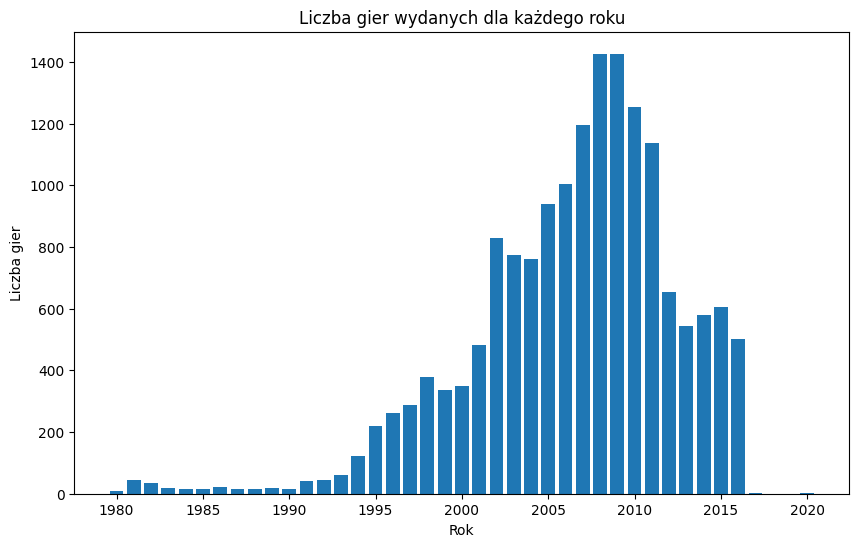

In [56]:
# Zliczenie ilości gier wydanych w każdym roku
games_per_year = data['Release_Date'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Rok')
plt.ylabel('Liczba gier')
plt.title('Liczba gier wydanych dla każdego roku')
plt.show()

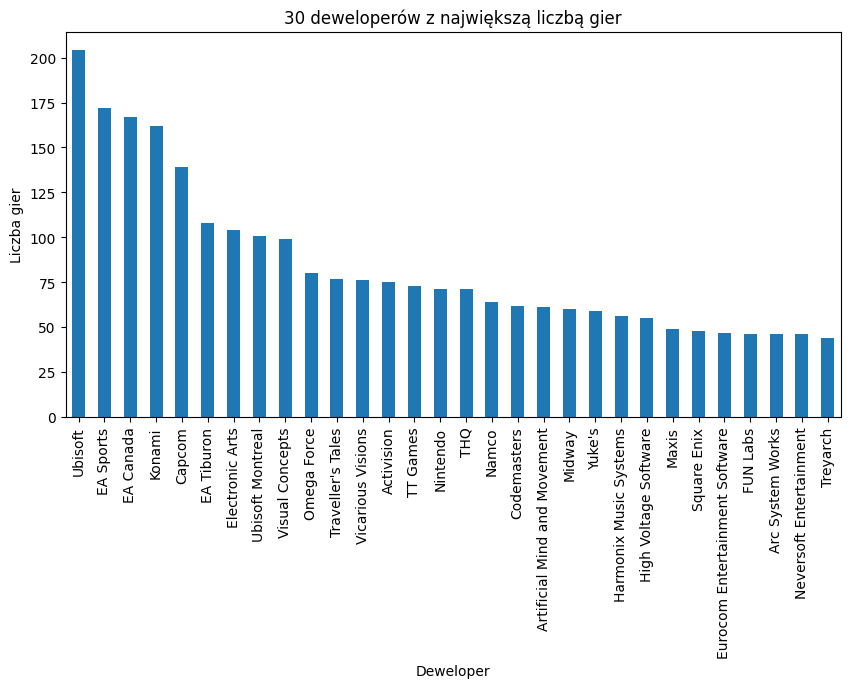

In [57]:
# 30 deweloperów z największą liczbą gier
developer_counts = data['Developer'].value_counts()[:30]

plt.figure(figsize=(10,5))
developer_counts.plot(kind='bar')
plt.title('30 deweloperów z największą liczbą gier')
plt.xlabel('Deweloper')
plt.ylabel('Liczba gier')
plt.show()

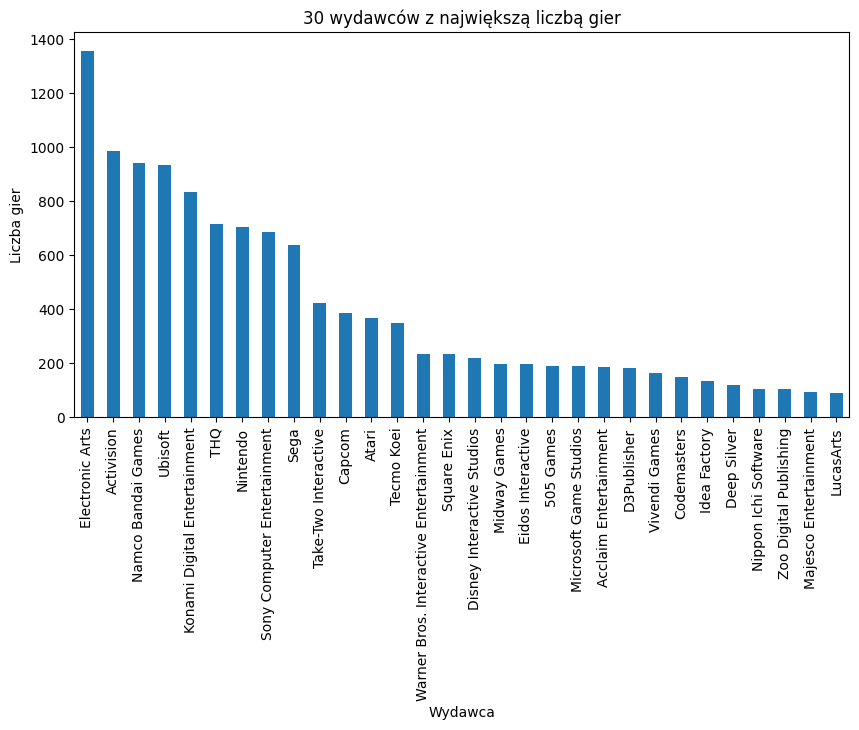

In [58]:
# 30 wydawców z największą liczbą gier
mask = data['Publisher'] != 'Unknown'
publisher_counts = data[mask]['Publisher'].value_counts()[:30]

plt.figure(figsize=(10,5))
publisher_counts.plot(kind='bar')
plt.title('30 wydawców z największą liczbą gier')
plt.xlabel('Wydawca')
plt.ylabel('Liczba gier')
plt.show()

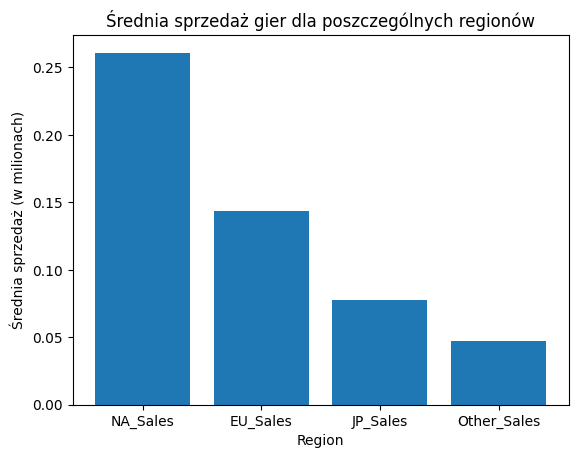

In [59]:
# Obliczenie średniej sprzedaży dla każdego regionu
average_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

plt.bar(average_sales.index, average_sales.values)
plt.xlabel('Region')
plt.ylabel('Średnia sprzedaż (w milionach)')
plt.title('Średnia sprzedaż gier dla poszczególnych regionów')
plt.show()

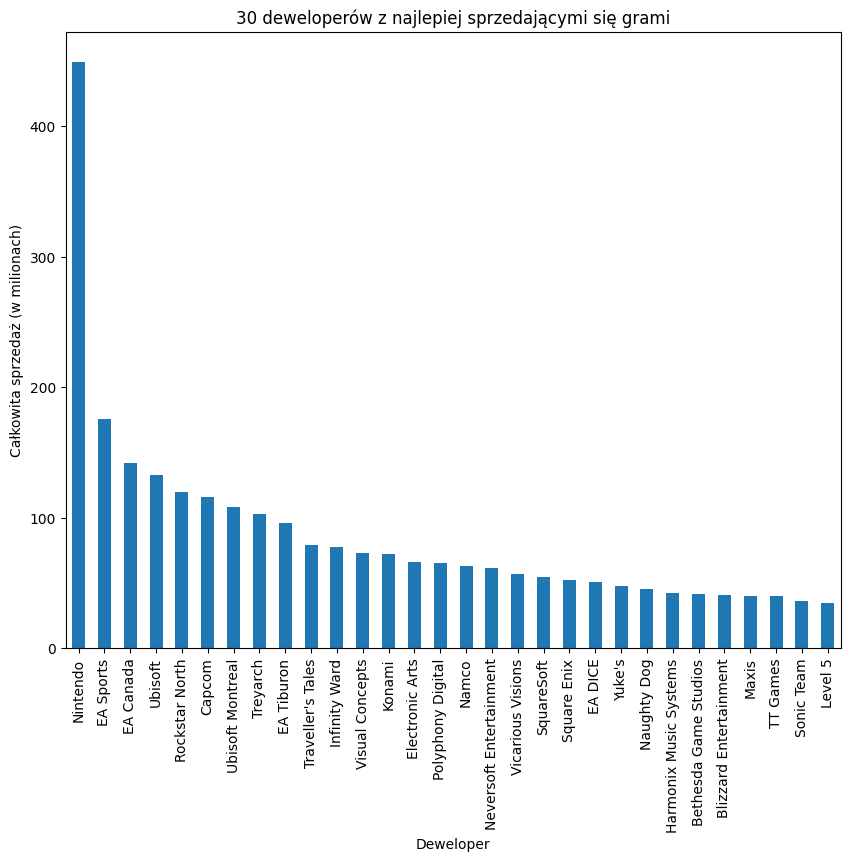

In [60]:
# Grupowanie danych według dewelopera i sumowanie sprzedaży
grouped_df = data.groupby('Developer')['Total_Sales'].sum().sort_values(ascending=False)

# Wybór 30 deweloperów z największą sprzedażą
top_30_developers = grouped_df.head(30)

plt.figure(figsize=(10, 8))
top_30_developers.plot(kind='bar')
plt.title('30 deweloperów z najlepiej sprzedającymi się grami')
plt.xlabel('Deweloper')
plt.ylabel('Całkowita sprzedaż (w milionach)')
plt.show()

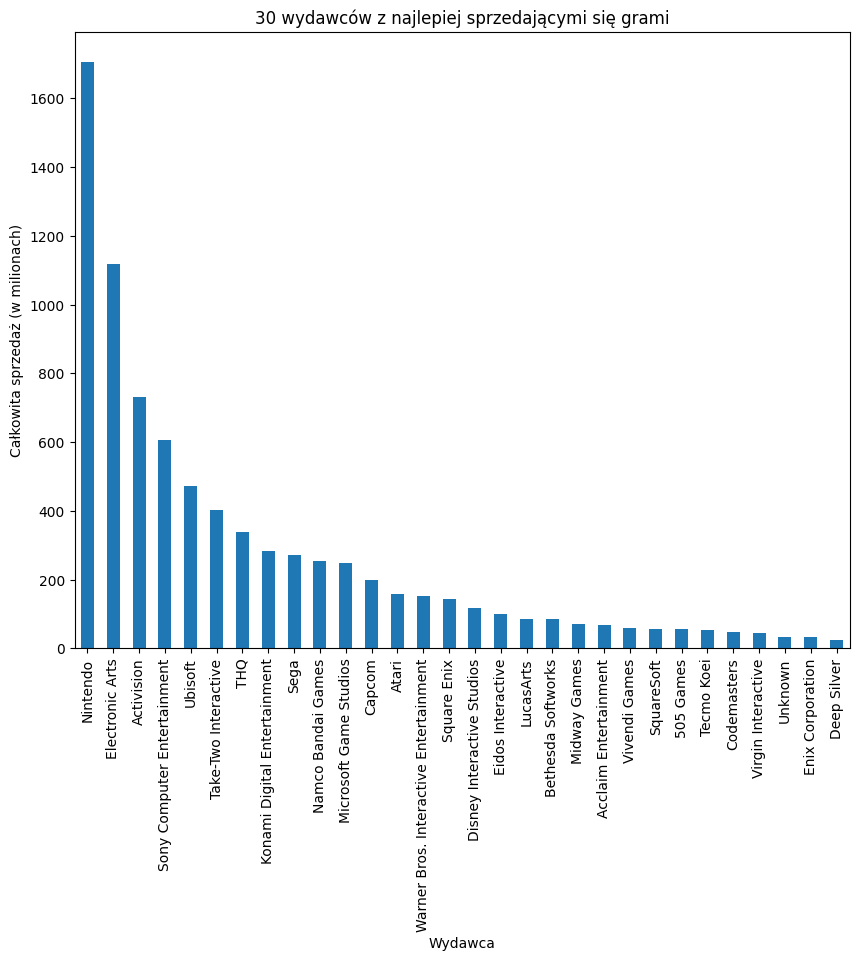

In [61]:
# Grupowanie danych według wydawcy i sumowanie sprzedaży
grouped_df = data.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False)

# Wybór 30 deweloperów z największą sprzedażą
top_30_publishers = grouped_df.head(30)

plt.figure(figsize=(10, 8))
top_30_publishers.plot(kind='bar')
plt.title('30 wydawców z najlepiej sprzedającymi się grami')
plt.xlabel('Wydawca')
plt.ylabel('Całkowita sprzedaż (w milionach)')
plt.show()

In [62]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Score,54.605814
User_Count,54.605814
Critic_Score,51.333892
Critic_Count,51.333892
Rating,40.489293
Developer,39.615983
Release_Date,1.609044
Publisher,0.323005
Name,0.011963
Genre,0.011963


In [63]:
data = data.dropna(subset=['Critic_Count'])
data = data.dropna(subset=['User_Count'])
data = data.dropna(subset=['Release_Date'])
data = data.dropna(subset=['Rating'])
data = data.dropna(subset=['Publisher'])
data = data.dropna(subset=['Developer'])

data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
print(missing_data.head(16))

Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [64]:
data.shape

(6824, 16)

In [65]:
data.reset_index(drop=True, inplace=True)
data.head()

,Name,Platform,Release_Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
2,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
3,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E


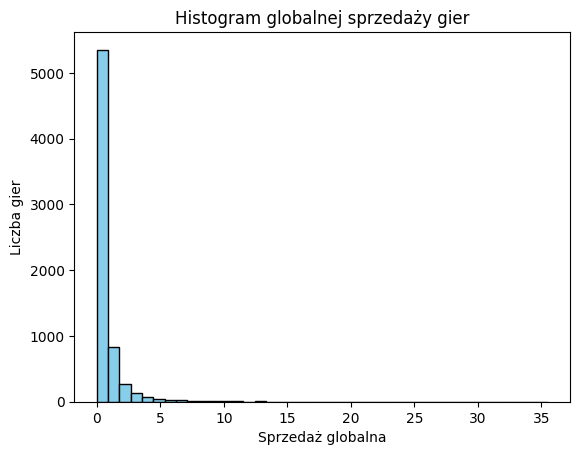

In [66]:
plt.hist(data['Total_Sales'], bins=40, color='skyblue', edgecolor='black')

plt.xlabel('Sprzedaż globalna')
plt.ylabel('Liczba gier')
plt.title('Histogram globalnej sprzedaży gier')

plt.show()

In [67]:
devs = len(data['Developer'].unique())
pubs = len(data['Publisher'].unique())
rats = len(data['Rating'].unique())
gens = len(data['Genre'].unique())
plats = len(data['Platform'].unique())
print('Developers: ', devs,'\nPublishers: ', pubs,'\nRatings: ', rats,'\nGenres: ', gens,'\nPlatforms: ', plats)

Developers:  1289 
Publishers:  262 
Ratings:  7 
Genres:  12 
Platforms:  17


In [68]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder(cols=['Platform', 'Genre', 'Rating', 'Developer', 'Publisher'])

data_copy = data.copy()
data = encoder.fit_transform(data)
data.head()

,Name,Platform,Release_Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Mario Kart Wii,1,2008,1,1,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,1,1
1,Wii Sports Resort,1,2009,2,1,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,1,1
2,New Super Mario Bros.,2,2006,3,1,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,1,1
3,Wii Play,1,2006,4,1,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,1,1
4,New Super Mario Bros. Wii,1,2009,3,1,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,1,1


In [69]:
print(data.columns)

Index(['Name', 'Platform', 'Release_Date', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [70]:
X = data[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']]

Y = data[['Total_Sales']]

print(X.shape)
print(Y.shape)

(6824, 10)
(6824, 1)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (5118, 10)
Y_train shape: (5118, 1)
X_test shape: (1706, 10)
Y_test shape: (1706, 1)


In [72]:
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

Model: Linear Regression
R^2 score: 0.4071
RMSE: 0.3615
Model: Lasso
R^2 score: 0.3343
RMSE: 0.3831
Model: Ridge
R^2 score: 0.4071
RMSE: 0.3615
Model: ElasticNet
R^2 score: 0.3571
RMSE: 0.3764
Model: Decision Tree
R^2 score: 0.4067
RMSE: 0.3616
Model: Random Forest
R^2 score: 0.7072
RMSE: 0.2541
Model: XGBoost
R^2 score: 0.6996
RMSE: 0.2573
Model: CatBoost
R^2 score: 0.7397
RMSE: 0.2396


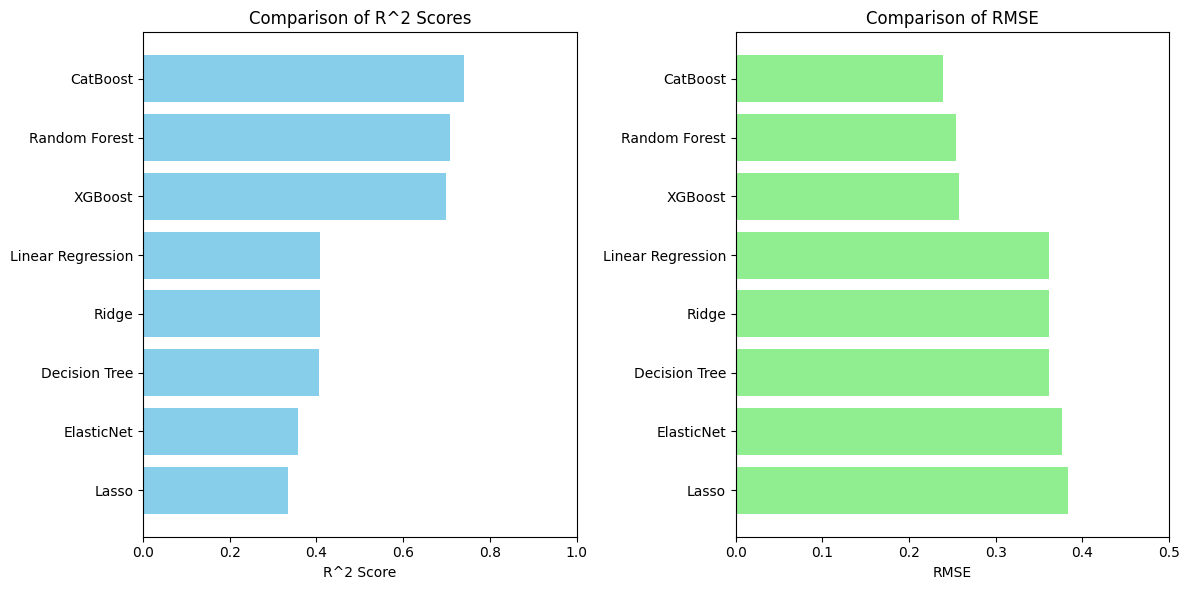

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from catboost import CatBoostRegressor

# Lista modeli do porównania
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False)
}

# Wyniki R^2 i RMSE dla każdego modelu
results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    test_preds = model.predict(X_test)

    r2 = r2_score(Y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

    results[name] = {"R^2": r2, "RMSE": rmse}

    print("Model: {}".format(name))
    print("R^2 score: {:.4f}".format(r2))
    print("RMSE: {:.4f}".format(rmse))
    print("=======================")

    
model_names = list(results.keys())
# Sortowanie wyników R^2 rosnąco
sorted_models_r2 = sorted(results.keys(), key=lambda x: results[x]["R^2"])
sorted_r2 = [results[model]["R^2"] for model in sorted_models_r2]

# Sortowanie wyników RMSE malejąco
sorted_models_rmse = sorted(results.keys(), key=lambda x: results[x]["RMSE"])[::-1]
sorted_rmse = [results[model]["RMSE"] for model in sorted_models_rmse]

plt.figure(figsize=(12, 6))

# Wykres R^2
plt.subplot(1, 2, 1)
plt.barh(sorted_models_r2, sorted_r2, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Comparison of R^2 Scores')
plt.xlim([0, 1])

# Wykres RMSE
plt.subplot(1, 2, 2)
plt.barh(sorted_models_rmse, sorted_rmse, color='lightgreen')
plt.xlabel('RMSE')
plt.title('Comparison of RMSE')
plt.xlim([0, 0.5])

plt.tight_layout()
plt.show()

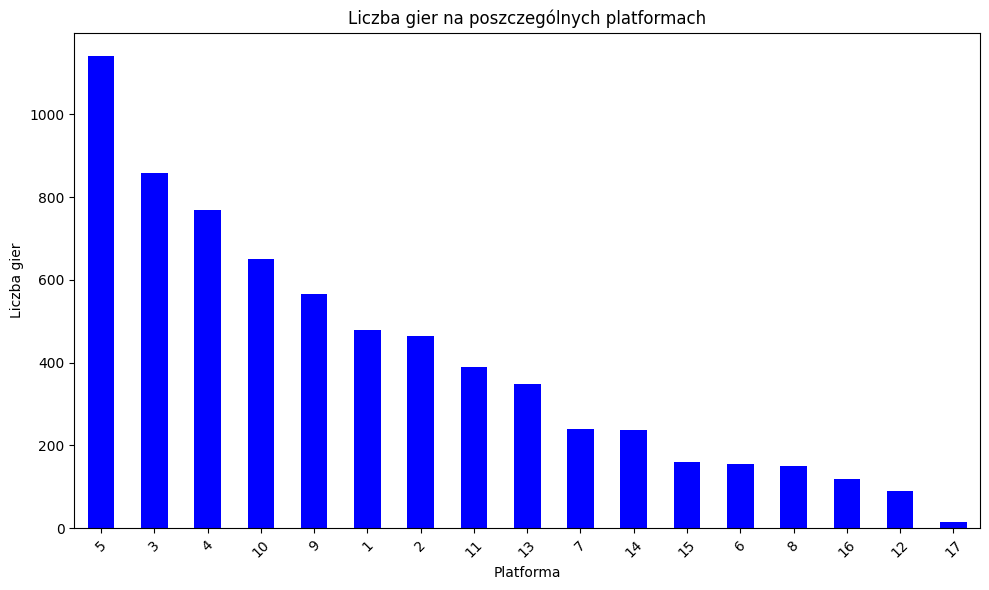

In [74]:
platform_counts = data["Platform"].value_counts()

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='blue') 
plt.title('Liczba gier na poszczególnych platformach')
plt.xlabel('Platforma')
plt.ylabel('Liczba gier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
data= data_copy[(data_copy['Platform'] == 'PS3') | (data_copy['Platform'] == 'PS4') | (data_copy['Platform'] == 'X360') | (data_copy['Platform'] == 'XOne') | (data_copy['Platform'] == 'Wii') | (data_copy['Platform'] == 'WiiU') | (data_copy['Platform'] == 'PC')]
data = data[data['Release_Date'] > 2005]

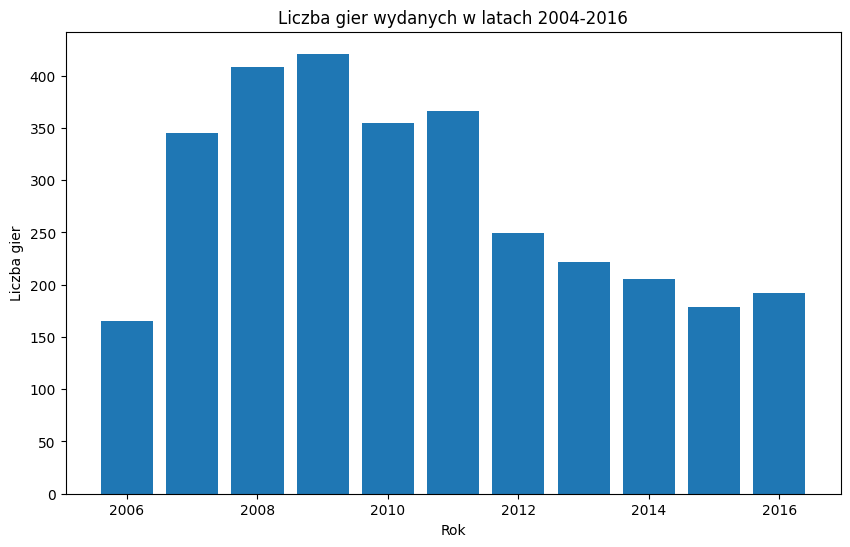

In [76]:
# Zliczenie ilości gier wydanych w latach 2004-2016
games_per_year = data['Release_Date'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Rok')
plt.ylabel('Liczba gier')
plt.title('Liczba gier wydanych w latach 2004-2016')
plt.show()

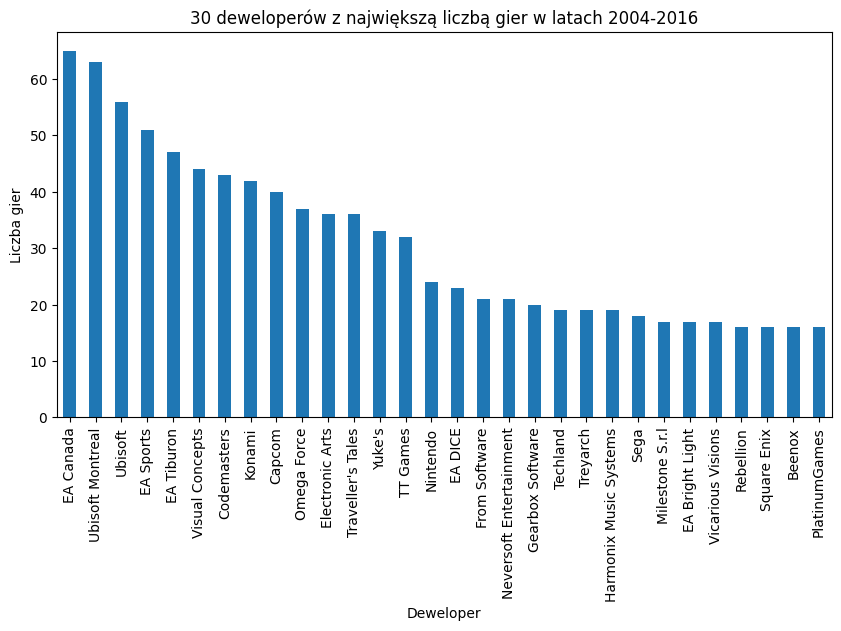

In [77]:
# 30 deweloperów z największą liczbą gier
developer_counts = data['Developer'].value_counts()[:30]

plt.figure(figsize=(10,5))
developer_counts.plot(kind='bar')
plt.title('30 deweloperów z największą liczbą gier w latach 2004-2016')
plt.xlabel('Deweloper')
plt.ylabel('Liczba gier')
plt.show()

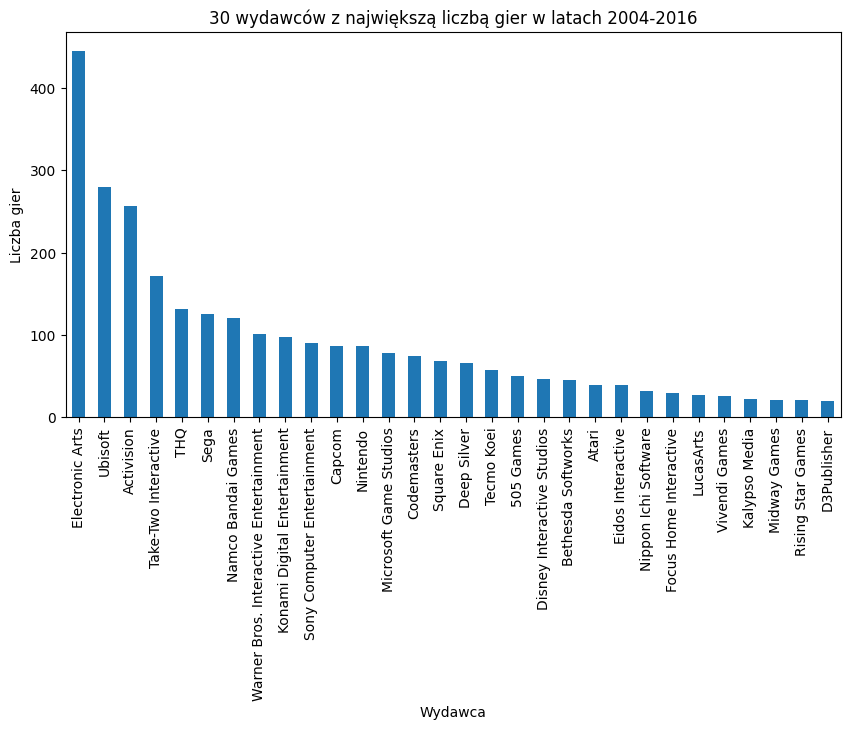

In [78]:
# 30 wydawców z największą liczbą gier
mask = data['Publisher'] != 'Unknown'
publisher_counts = data[mask]['Publisher'].value_counts()[:30]

# Wygenerowanie wykresu słupkowego
plt.figure(figsize=(10,5))
publisher_counts.plot(kind='bar')
plt.title('30 wydawców z największą liczbą gier w latach 2004-2016')
plt.xlabel('Wydawca')
plt.ylabel('Liczba gier')
plt.show()

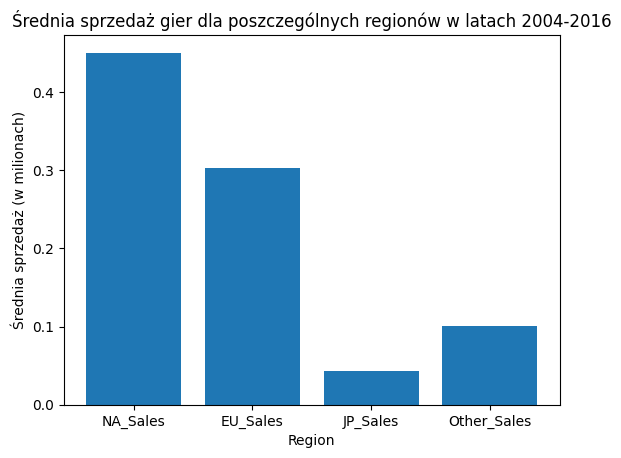

In [79]:
# Obliczenie średniej sprzedaży dla każdego regionu
average_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

plt.bar(average_sales.index, average_sales.values)
plt.xlabel('Region')
plt.ylabel('Średnia sprzedaż (w milionach)')
plt.title('Średnia sprzedaż gier dla poszczególnych regionów w latach 2004-2016')
plt.show()

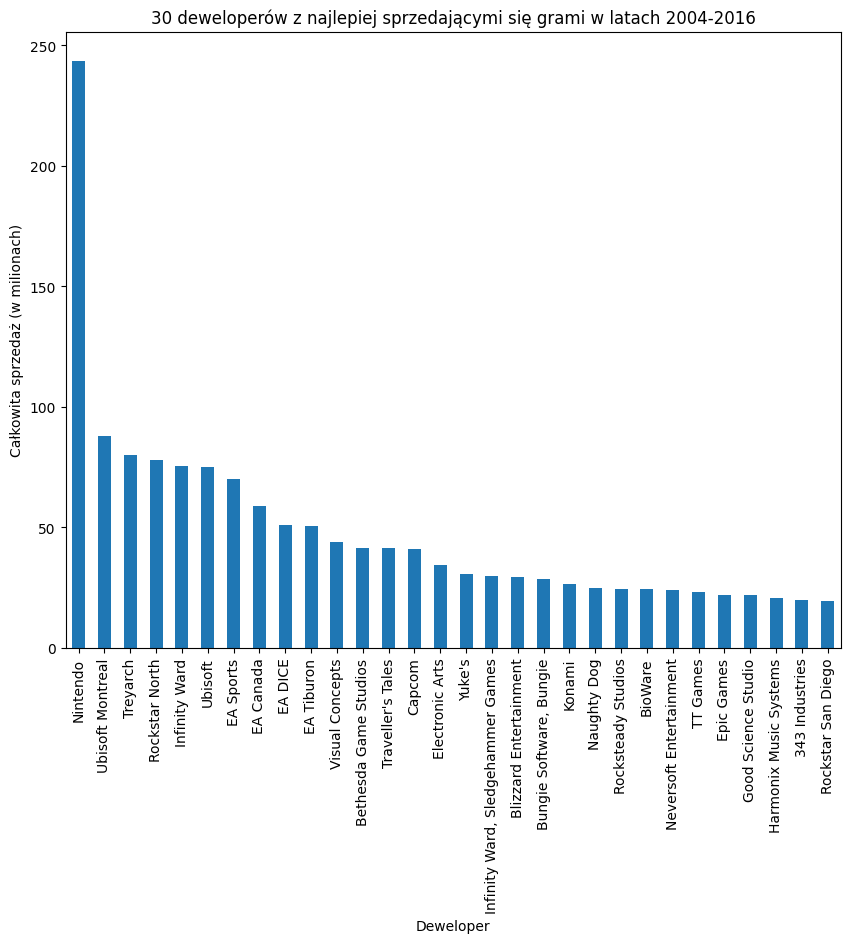

In [80]:
# Grupowanie danych według dewelopera i sumowanie sprzedaży
grouped_df = data.groupby('Developer')['Total_Sales'].sum().sort_values(ascending=False)

# Wybór 30 deweloperów z największą sprzedażą
top_30_developers = grouped_df.head(30)

# Generowanie wykresu
plt.figure(figsize=(10, 8))
top_30_developers.plot(kind='bar')
plt.title('30 deweloperów z najlepiej sprzedającymi się grami w latach 2004-2016')
plt.xlabel('Deweloper')
plt.ylabel('Całkowita sprzedaż (w milionach)')
plt.show()

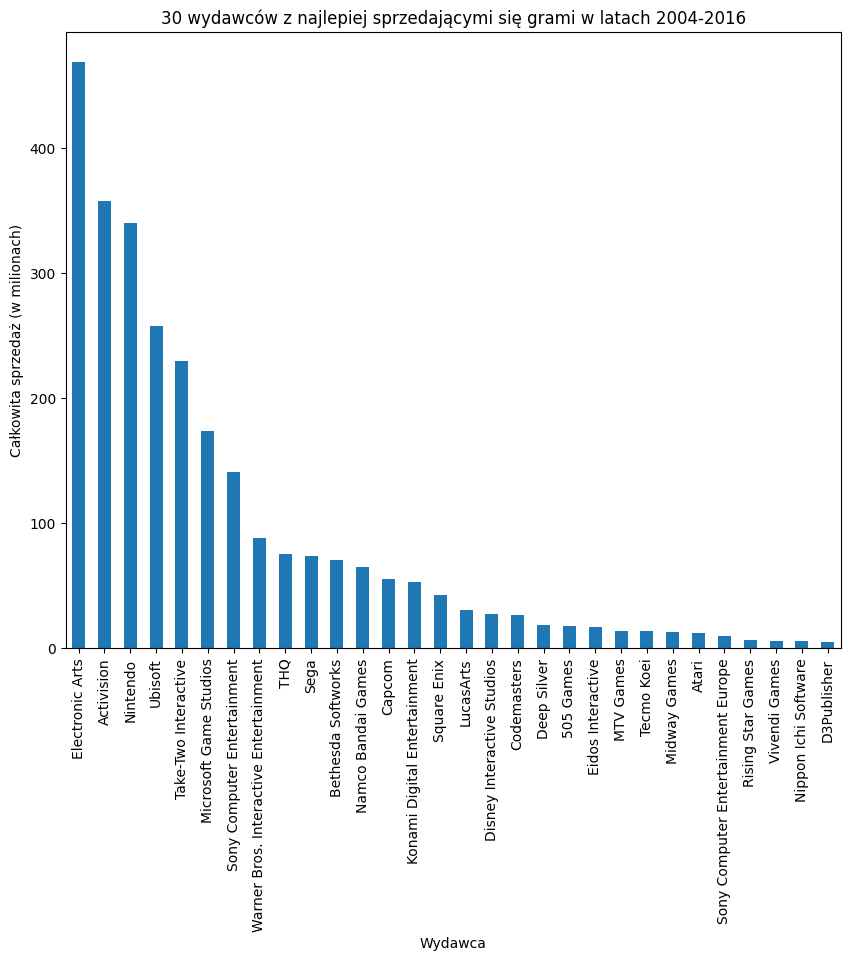

In [81]:
# Grupowanie danych według wydawcy i sumowanie sprzedaży
grouped_df = data.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False)

# Wybór 30 deweloperów z największą sprzedażą
top_30_publishers = grouped_df.head(30)

plt.figure(figsize=(10, 8))
top_30_publishers.plot(kind='bar')
plt.title('30 wydawców z najlepiej sprzedającymi się grami w latach 2004-2016')
plt.xlabel('Wydawca')
plt.ylabel('Całkowita sprzedaż (w milionach)')
plt.show()

In [82]:
data = encoder.fit_transform(data)
data.head()

X = data[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']]

Y = data[['Total_Sales']]

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

(3107, 10)
(3107, 1)


In [83]:
def plot_comparison_with_percentage(results_1, results_2, metric, color, ylabel, title, xlim, reverse_color=False, reverse_sort=False):
    models_1 = list(results_1.keys())
    values_1 = np.array([results_1[model][metric] for model in models_1])

    models_2 = list(results_2.keys())
    values_2 = np.array([results_2[model][metric] for model in models_2])

    percentage_change = np.zeros_like(values_1)
    non_zero_indices = np.where(values_1 != 0)
    percentage_change[non_zero_indices] = ((values_2[non_zero_indices] - values_1[non_zero_indices]) / values_1[non_zero_indices]) * 100

    sorted_indices = np.argsort(values_2)
    sorted_models_2 = [models_2[i] for i in sorted_indices]
    sorted_values_2 = values_2[sorted_indices]
    sorted_percentage_change = percentage_change[sorted_indices]

    if reverse_sort:
        sorted_models_2 = sorted_models_2[::-1]
        sorted_values_2 = sorted_values_2[::-1]
        sorted_percentage_change = sorted_percentage_change[::-1]

    plt.barh(sorted_models_2, sorted_values_2, color=color)
    
    for i, (model, value, percentage) in enumerate(zip(sorted_models_2, sorted_values_2, sorted_percentage_change)):
        if np.round(percentage, 2) != 0:
            if reverse_color:
                label_color = 'red' if percentage >= 0 else 'green'
                plt.text(value, i, f'{percentage:+.2f}%', ha='left', va='center', color=label_color)
            else:
                label_color = 'green' if percentage >= 0 else 'red'
                plt.text(value, i, f'{percentage:+.2f}%', ha='left', va='center', color=label_color)
    
    plt.xlabel(ylabel)
    plt.title(title)
    plt.xlim([0, xlim])
    plt.tight_layout()

In [84]:
results_newplat = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    test_preds = model.predict(X_test)

    r2 = r2_score(Y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

    results_newplat[name] = {"R^2": r2, "RMSE": rmse}

    print("Model: {}".format(name))
    print("R^2 score: {:.4f}".format(r2))
    print("RMSE: {:.4f}".format(rmse))
    print("=======================")

Model: Linear Regression
R^2 score: 0.5170
RMSE: 0.3563
Model: Lasso
R^2 score: 0.4608
RMSE: 0.3764
Model: Ridge
R^2 score: 0.5170
RMSE: 0.3563
Model: ElasticNet
R^2 score: 0.4658
RMSE: 0.3747
Model: Decision Tree
R^2 score: 0.5409
RMSE: 0.3473
Model: Random Forest
R^2 score: 0.8020
RMSE: 0.2281
Model: XGBoost
R^2 score: 0.7795
RMSE: 0.2407
Model: CatBoost
R^2 score: 0.8269
RMSE: 0.2133


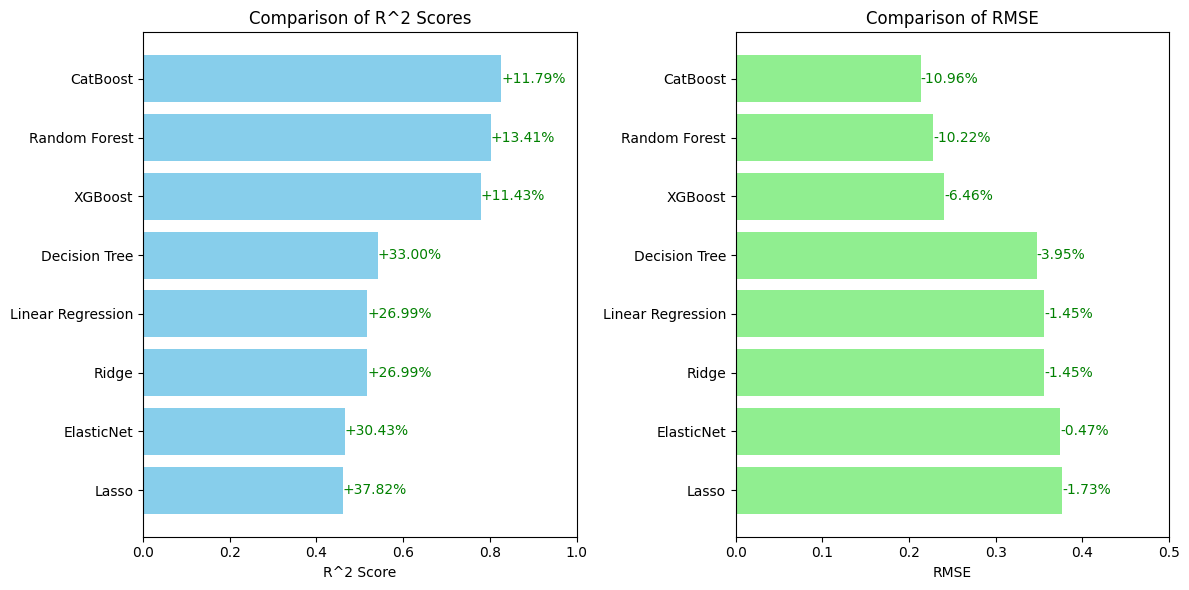

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_comparison_with_percentage(results, results_newplat, 'R^2', 'skyblue', 'R^2 Score', 'Comparison of R^2 Scores', 1)

plt.subplot(1, 2, 2)
plot_comparison_with_percentage(results, results_newplat, "RMSE" , 'lightgreen', 'RMSE', 'Comparison of RMSE', 0.5, True, True)

plt.show()

In [86]:
from skopt import BayesSearchCV

param_grid = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    },
    'Lasso': {
        'alpha': (1e-10, 1e-3, 'log-uniform'),
        'max_iter': (100, 100000)
    },
    'Ridge': {
        'alpha': (1e-5, 1e5, 'log-uniform')
    },
    'ElasticNet': {
        'alpha': (1e-5, 1e5, 'log-uniform'),
        'l1_ratio': (0.0, 1.0, 'uniform')
    },
    'Decision Tree': {
        'max_depth': (40, 100),
        'min_samples_split': (2, 5),
        'min_samples_leaf': (5, 9)
    },
    'Random Forest': {
        'n_estimators': (350, 450),
        'max_depth': (30, 50),
        'max_features': (15, 30),
    },
    'XGBoost': {
        'learning_rate': (0.01, 0.2),
        'max_depth': (6, 10),
        'n_estimators': (650, 800),
        'gamma': (0.001, 0.1),
        'subsample': (0.1, 0.6),
    },
    'CatBoost': {
        'iterations': (100, 500),
        'learning_rate': (0.01, 1.0),
        'depth': (1, 10),
        'subsample': (0.1, 1.0),
    }
}
    

results_newplat_hp = {}

for name, model in models.items():
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=param_grid[name],
        n_iter=50,
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    
    bayes_search.fit(X_train, Y_train)
    test_preds = bayes_search.predict(X_test)

    r2 = r2_score(Y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

    results_newplat_hp[name] = {"R^2": r2, "RMSE": rmse}

    print("Model: {}".format(name))
    print("Best params:", bayes_search.best_params_)
    print("R^2 score: {:.4f}".format(r2))
    print("RMSE: {:.4f}".format(rmse))
    print("=======================")

Model: Linear Regression
Best params: OrderedDict({'copy_X': True, 'fit_intercept': False})
R^2 score: 0.5158
RMSE: 0.3567
Model: Lasso
Best params: OrderedDict({'alpha': 0.001, 'max_iter': 13103})
R^2 score: 0.5170
RMSE: 0.3563
Model: Ridge
Best params: OrderedDict({'alpha': 218.94711701238785})
R^2 score: 0.5166
RMSE: 0.3564
Model: ElasticNet
Best params: OrderedDict({'alpha': 0.12238793180153076, 'l1_ratio': 0.0010744368998934675})
R^2 score: 0.5164
RMSE: 0.3565
Model: Decision Tree
Best params: OrderedDict({'max_depth': 71, 'min_samples_leaf': 5, 'min_samples_split': 5})
R^2 score: 0.6570
RMSE: 0.3002
Model: Random Forest
Best params: OrderedDict({'max_depth': 50, 'max_features': 15, 'n_estimators': 427})
R^2 score: 0.8071
RMSE: 0.2251
Model: XGBoost
Best params: OrderedDict({'gamma': 0.001582954219670981, 'learning_rate': 0.013373466700737992, 'max_depth': 8, 'n_estimators': 768, 'subsample': 0.4961024320549263})
R^2 score: 0.8262
RMSE: 0.2137
Model: CatBoost
Best params: OrderedD

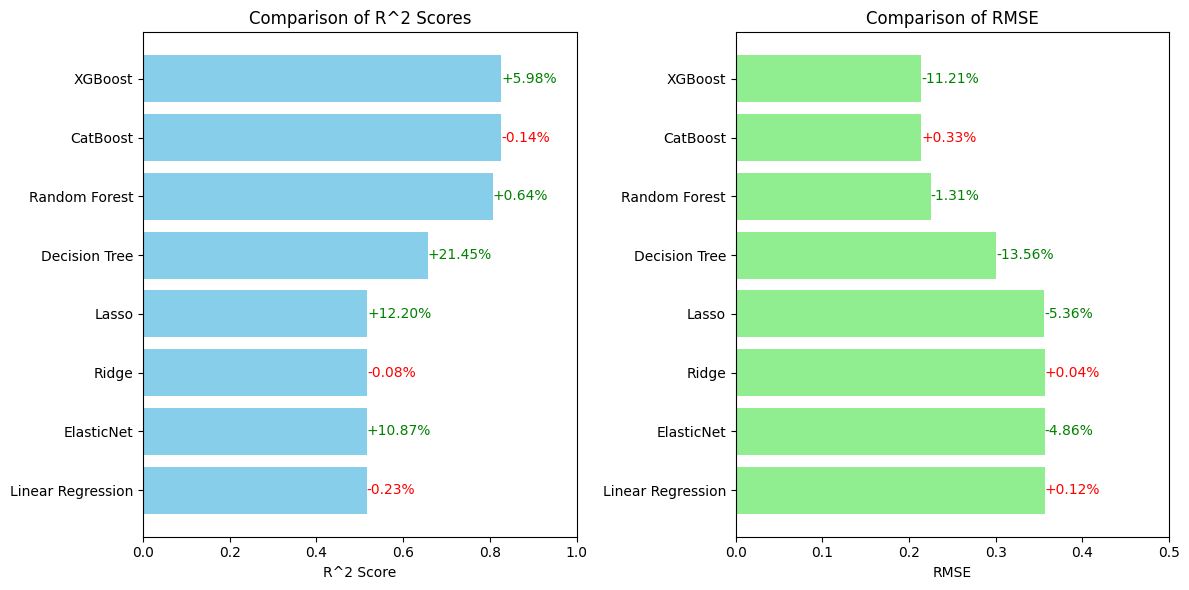

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_comparison_with_percentage(results_newplat, results_newplat_hp, 'R^2', 'skyblue', 'R^2 Score', 'Comparison of R^2 Scores', 1)

plt.subplot(1, 2, 2)
plot_comparison_with_percentage(results_newplat, results_newplat_hp, "RMSE" , 'lightgreen', 'RMSE', 'Comparison of RMSE', 0.5, True, True)

plt.show()

In [88]:
data = data_copy

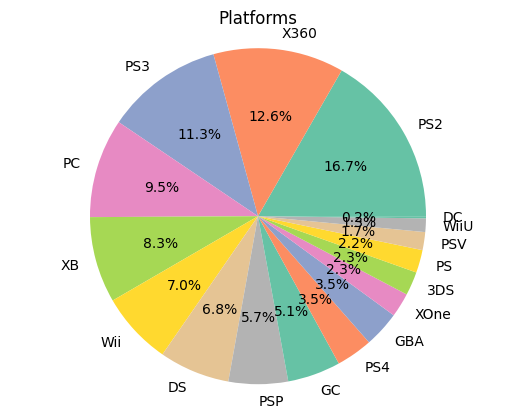

In [89]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), labels=labels, autopct="%1.1f%%")
    fig = plt.gcf()

donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal");

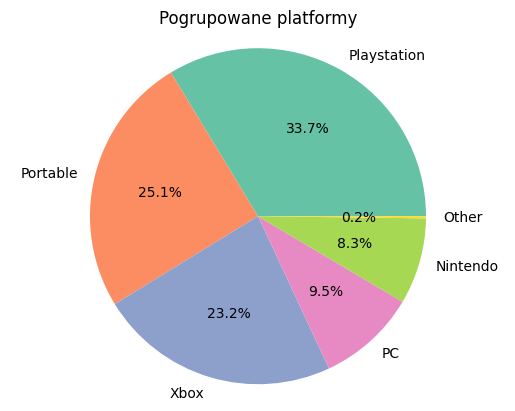

In [90]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(data["Grouped_Platform"])
plt.title("Pogrupowane platformy")
plt.axis("equal");

In [91]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]
data = data[data['Release_Date'] > 2005]

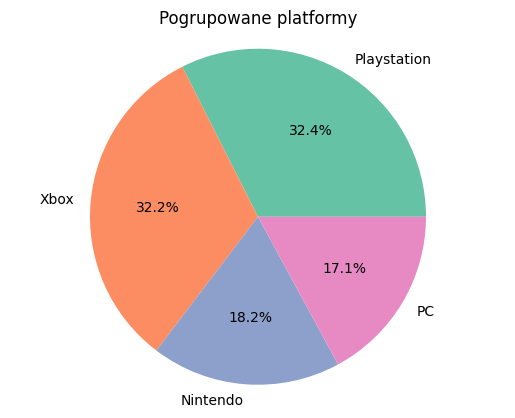

In [92]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(data["Grouped_Platform"])
plt.title("Pogrupowane platformy")
plt.axis("equal");

In [93]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])

In [94]:
developer_games_count = data['Developer'].value_counts()

def developer_group(row):
    if row['Developer'] in developer_games_count.index[:20]:
        return 5
    elif row['Developer'] in developer_games_count.index[20:40]:
        return 4
    elif row['Developer'] in developer_games_count.index[40:60]:
        return 3
    elif row['Developer'] in developer_games_count.index[60:80]:
        return 2
    else:
        return 1

data['Developer_Rank'] = data.apply(developer_group, axis=1)

publisher_games_count = data['Publisher'].value_counts()

def publisher_group(row):
    if row['Publisher'] in publisher_games_count.index[:20]:
        return 5
    elif row['Publisher'] in publisher_games_count.index[20:40]:
        return 4
    elif row['Publisher'] in publisher_games_count.index[40:60]:
        return 3
    elif row['Publisher'] in publisher_games_count.index[60:80]:
        return 2
    else:
        return 1

data['Publisher_Rank'] = data.apply(publisher_group, axis=1)

print(data[['Publisher', 'Developer', 'Publisher_Rank', 'Developer_Rank']].sample(10).to_string(index=False))

                  Publisher               Developer  Publisher_Rank  Developer_Rank
                     Capcom   DONTNOD Entertainment               5               1
            Electronic Arts             EA Montreal               5               1
          Eidos Interactive         Nixxes Software               4               1
                    Ubisoft             Ivory Tower               5               1
         Namco Bandai Games           From Software               5               5
Sony Computer Entertainment    Naughty Dog, SCE/WWS               5               1
                      Atari         Spark Unlimited               4               1
       Nippon Ichi Software    Nippon Ichi Software               4               1
                     Capcom              WayForward               5               1
     Focus Home Interactive Monte Cristo Multimedia               4               1


In [95]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [96]:
data = data.dropna(subset=['Rating'])
data = data.dropna(subset=['Release_Date'])
data = data.dropna(subset=['Publisher'])
data = data.dropna(subset=['Weighted_Score'])

data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [97]:
data.shape
data.reset_index(drop=True, inplace=True)

['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating', 'Grouped_Platform']


<Axes: title={'center': 'Korelacja Pearsona cech numerycznych gier wideo'}>

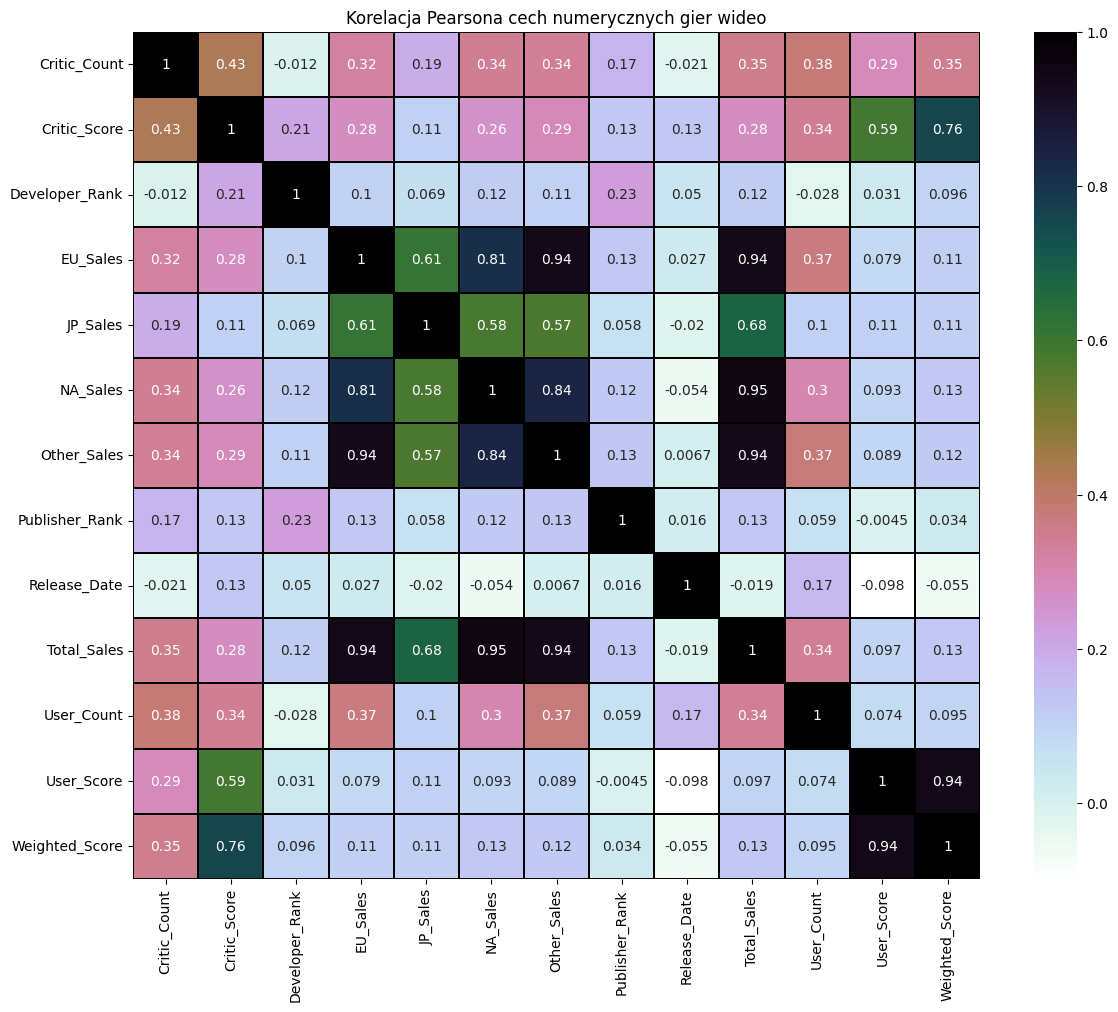

In [98]:
str_list = []
for colname, colvalue in data.items():
    if type(colvalue[2]) == str:
         str_list.append(colname)
print(str_list)

num_list = data.columns.difference(str_list)

data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Korelacja Pearsona cech numerycznych gier wideo')

sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0,
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [99]:
encoder = OrdinalEncoder(cols=['Platform','Grouped_Platform', 'Genre', 'Rating', 'Developer', 'Publisher'])

data = encoder.fit_transform(data)
data.head()

,Name,Platform,Release_Date,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Grouped_Platform,Weighted_Score,Developer_Rank,Publisher_Rank
0,Mario Kart Wii,1,2008,1,1,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,1,1,1,82.90665,5,5
1,Wii Sports Resort,1,2009,2,1,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,1,1,1,80.0,5,5
2,Wii Play,1,2006,3,1,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,1,1,1,64.070588,5,5
3,New Super Mario Bros. Wii,1,2009,4,1,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,1,1,1,84.356083,5,5
4,Wii Fit,1,2007,2,1,8.92,8.03,3.60,2.15,22.70,80,63,7.7,146,1,1,1,77.904306,5,5


In [100]:
print(data.columns)

Index(['Name', 'Platform', 'Release_Date', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score', 'Developer_Rank',
       'Publisher_Rank'],
      dtype='object')


In [101]:
X = data[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score', 'Developer_Rank', 'Publisher_Rank']]

Y = data[['Total_Sales']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

Model: Linear Regression
Best params: OrderedDict({'copy_X': True, 'fit_intercept': False})
R^2 score: 0.5405
RMSE: 0.3475
Model: Lasso
Best params: OrderedDict({'alpha': 0.0003579078475494511, 'max_iter': 98759})
R^2 score: 0.5405
RMSE: 0.3475
Model: Ridge
Best params: OrderedDict({'alpha': 45.357356508224754})
R^2 score: 0.5402
RMSE: 0.3476
Model: ElasticNet
Best params: OrderedDict({'alpha': 0.019294330376834336, 'l1_ratio': 0.0})
R^2 score: 0.5402
RMSE: 0.3476
Model: Decision Tree
Best params: OrderedDict({'max_depth': 89, 'min_samples_leaf': 6, 'min_samples_split': 4})
R^2 score: 0.6129
RMSE: 0.3189


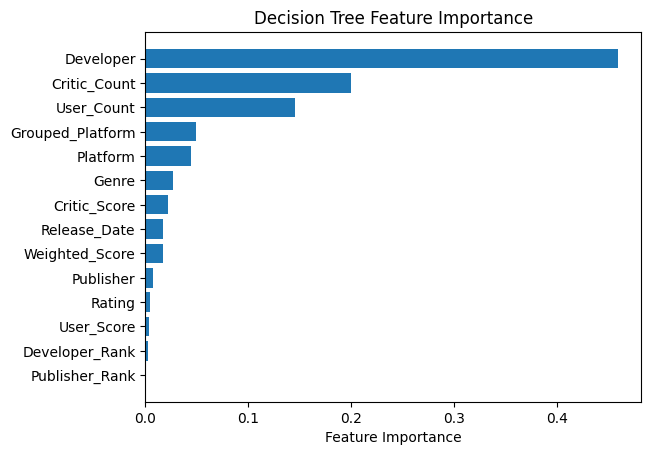

Model: Random Forest
Best params: OrderedDict({'max_depth': 50, 'max_features': 15, 'n_estimators': 427})
R^2 score: 0.8098
RMSE: 0.2236


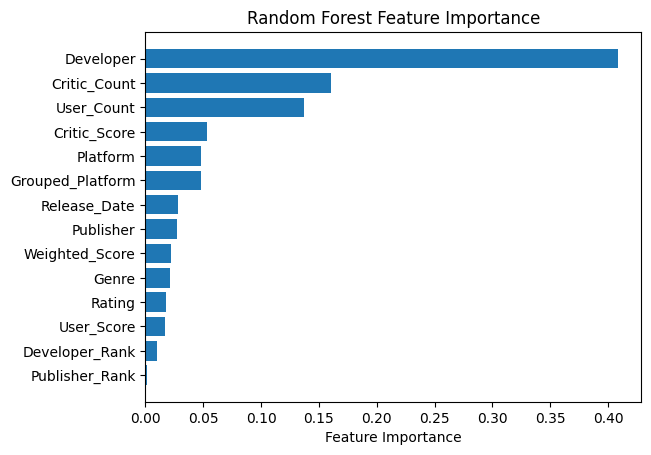

Model: XGBoost
Best params: OrderedDict({'gamma': 0.001, 'learning_rate': 0.01180264937293723, 'max_depth': 6, 'n_estimators': 795, 'subsample': 0.6})
R^2 score: 0.8282
RMSE: 0.2125


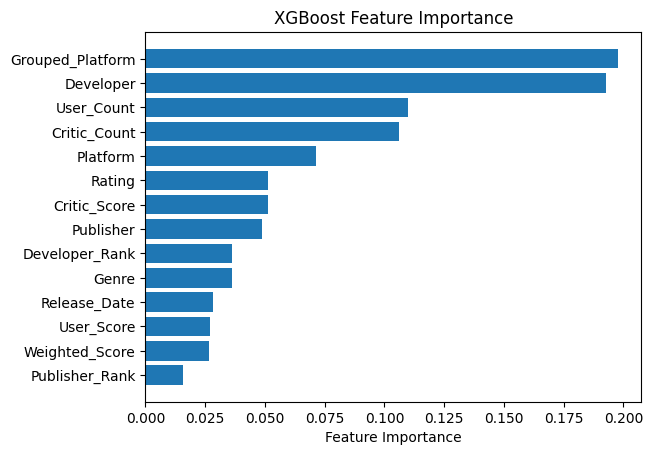

Model: CatBoost
Best params: OrderedDict({'depth': 6, 'iterations': 438, 'learning_rate': 0.1661297713668823, 'subsample': 0.3981013833447903})
R^2 score: 0.8236
RMSE: 0.2153


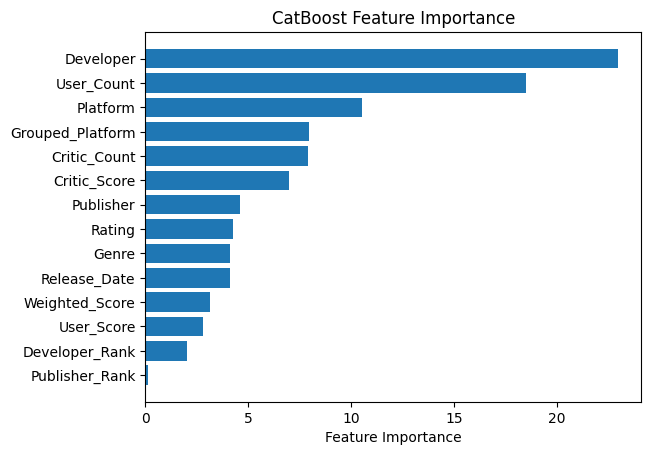

In [102]:
param_grid = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    },
    'Lasso': {
        'alpha': (1e-10, 1e-3, 'log-uniform'),
        'max_iter': (100, 100000)
    },
    'Ridge': {
        'alpha': (1e-5, 1e5, 'log-uniform')
    },
    'ElasticNet': {
        'alpha': (1e-5, 1e5, 'log-uniform'),
        'l1_ratio': (0.0, 1.0, 'uniform')
    },
    'Decision Tree': {
        'max_depth': (40, 100),
        'min_samples_split': (2, 5),
        'min_samples_leaf': (5, 9)
    },
    'Random Forest': {
        'n_estimators': (350, 450),
        'max_depth': (30, 50),
        'max_features': (15, 30),
    },
    'XGBoost': {
        'learning_rate': (0.01, 0.2),
        'max_depth': (6, 10),
        'n_estimators': (650, 800),
        'gamma': (0.001, 0.1),
        'subsample': (0.1, 0.6),
    },
    'CatBoost': {
        'iterations': (100, 500),
        'learning_rate': (0.01, 1.0),
        'depth': (1, 10),
        'subsample': (0.1, 1.0),
    }
}

results_newplat_hp_custom = {}


for name, model in models.items():

    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=param_grid[name],
        n_iter=50,
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    
    bayes_search.fit(X_train, Y_train)
    test_preds = bayes_search.predict(X_test)

    r2 = r2_score(Y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

    results_newplat_hp_custom[name] = {"R^2": r2, "RMSE": rmse}

    print("Model: {}".format(name))
    print("Best params:", bayes_search.best_params_)
    print("R^2 score: {:.4f}".format(r2))
    print("RMSE: {:.4f}".format(rmse))
    print("=======================")

    if hasattr(bayes_search.best_estimator_, 'feature_importances_'):
        feature_importance = bayes_search.best_estimator_.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5

        plt.figure()
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, X_train.columns.values[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(f'{name} Feature Importance')
        plt.show()

In [103]:
X = data[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score']]

Y = data[['Total_Sales']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [104]:
param_grid = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    },
    'Lasso': {
        'alpha': (1e-10, 1e-3, 'log-uniform'),
        'max_iter': (100, 100000)
    },
    'Ridge': {
        'alpha': (1e-5, 1e5, 'log-uniform')
    },
    'ElasticNet': {
        'alpha': (1e-5, 1e5, 'log-uniform'),
        'l1_ratio': (0.0, 1.0, 'uniform')
    },
    'Decision Tree': {
        'max_depth': (40, 100),
        'min_samples_split': (2, 5),
        'min_samples_leaf': (5, 9)
    },
    'Random Forest': {
        'n_estimators': (350, 450),
        'max_depth': (30, 50),
        'max_features': (15, 30),
    },
    'XGBoost': {
        'learning_rate': (0.01, 0.2),
        'max_depth': (6, 10),
        'n_estimators': (650, 800),
        'gamma': (0.001, 0.1),
        'subsample': (0.1, 0.6),
    },
    'CatBoost': {
        'iterations': (100, 500),
        'learning_rate': (0.01, 1.0),
        'depth': (1, 10),
        'subsample': (0.1, 1.0),
    }
}

results_newplat_hp_custom = {}


for name, model in models.items():

    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=param_grid[name],
        n_iter=50,
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    
    bayes_search.fit(X_train, Y_train)
    test_preds = bayes_search.predict(X_test)

    r2 = r2_score(Y_test, test_preds)
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

    results_newplat_hp_custom[name] = {"R^2": r2, "RMSE": rmse}

    print("Model: {}".format(name))
    print("Best params:", bayes_search.best_params_)
    print("R^2 score: {:.4f}".format(r2))
    print("RMSE: {:.4f}".format(rmse))
    print("=======================")

Model: Linear Regression
Best params: OrderedDict({'copy_X': True, 'fit_intercept': False})
R^2 score: 0.5397
RMSE: 0.3478
Model: Lasso
Best params: OrderedDict({'alpha': 0.001, 'max_iter': 13105})
R^2 score: 0.5395
RMSE: 0.3479
Model: Ridge
Best params: OrderedDict({'alpha': 57.13311064630241})
R^2 score: 0.5393
RMSE: 0.3479
Model: ElasticNet
Best params: OrderedDict({'alpha': 0.0035309956495643835, 'l1_ratio': 0.9958311365456176})
R^2 score: 0.5395
RMSE: 0.3479
Model: Decision Tree
Best params: OrderedDict({'max_depth': 89, 'min_samples_leaf': 6, 'min_samples_split': 4})
R^2 score: 0.6132
RMSE: 0.3188
Model: Random Forest
Best params: OrderedDict({'max_depth': 49, 'max_features': 29, 'n_estimators': 427})
R^2 score: 0.8104
RMSE: 0.2232
Model: XGBoost
Best params: OrderedDict({'gamma': 0.001, 'learning_rate': 0.03444203568759358, 'max_depth': 6, 'n_estimators': 650, 'subsample': 0.45403921392053725})
R^2 score: 0.8289
RMSE: 0.2120
Model: CatBoost
Best params: OrderedDict({'depth': 7, 

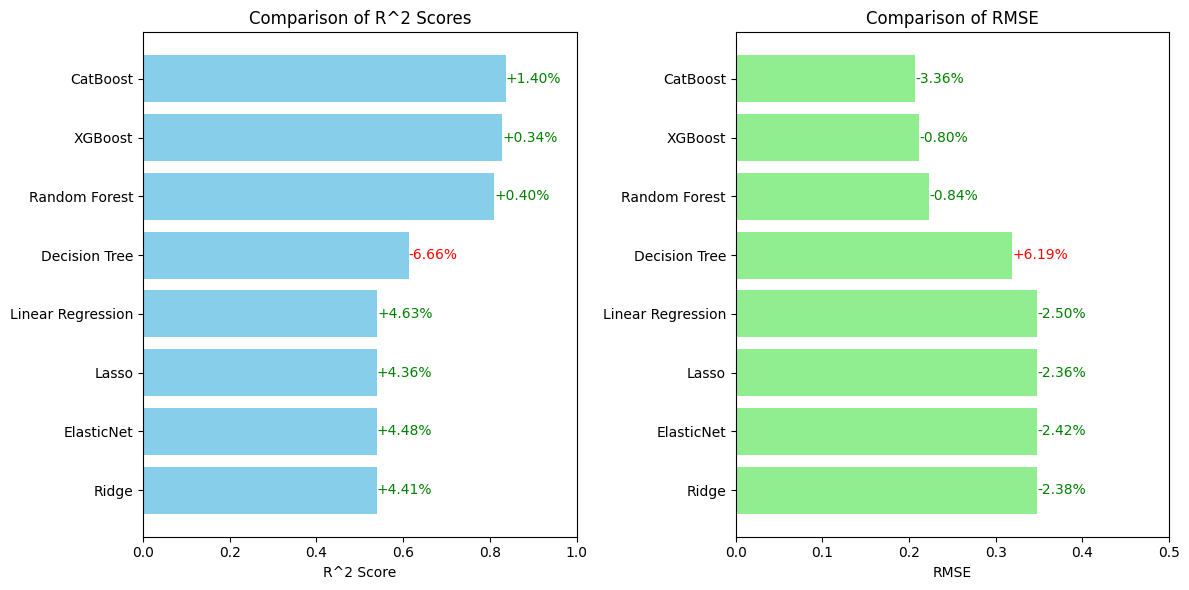

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_comparison_with_percentage(results_newplat_hp, results_newplat_hp_custom, 'R^2', 'skyblue', 'R^2 Score', 'Comparison of R^2 Scores', 1)

plt.subplot(1, 2, 2)
plot_comparison_with_percentage(results_newplat_hp, results_newplat_hp_custom, "RMSE" , 'lightgreen', 'RMSE', 'Comparison of RMSE', 0.5, True, True)

plt.show()

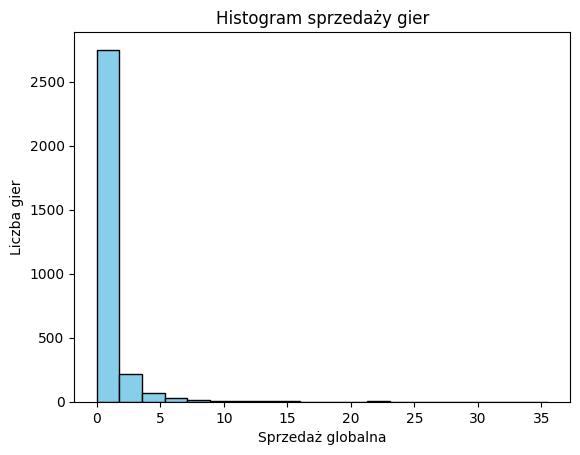

In [106]:
data = data_copy
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]
data = data[data['Release_Date'] > 2005]

platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU", "Nintendo Switch"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))

data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                           data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])

data["User_Score"] = data['User_Score'] * 10

developer_games_count = data['Developer'].value_counts()
data['Developer_Rank'] = data.apply(developer_group, axis=1)

publisher_games_count = data['Publisher'].value_counts()
data['Publisher_Rank'] = data.apply(publisher_group, axis=1)

data = data.dropna(subset=['Rating'])
data = data.dropna(subset=['Release_Date'])
data = data.dropna(subset=['Publisher'])
data.reset_index(drop=True, inplace=True)

plt.hist(data['Total_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sprzedaż globalna')
plt.ylabel('Liczba gier')
plt.title('Histogram sprzedaży gier')
plt.show()

In [107]:
encoder = OrdinalEncoder(cols=['Grouped_Platform', 'Platform', 'Genre', 'Rating', 'Developer', 'Publisher'])
data = encoder.fit_transform(data)

print(data.columns)

Index(['Name', 'Platform', 'Release_Date', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score', 'Developer_Rank',
       'Publisher_Rank'],
      dtype='object')


In [108]:
X = data[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score']]

Y = data[['Total_Sales']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [109]:
params_cat = {
    'depth': [6],
    'iterations': [456],
    'learning_rate': [0.14659781970758418],
    'subsample': [1.0]
}
params_xgb = {
    'gamma': [0.001],
    'learning_rate': [0.026912819763445693],
    'max_depth': [6],
    'n_estimators': [800],
    'subsample': [0.6]
}

params_rf = {
    'max_depth': [49],
    'max_features': [30],
    'n_estimators': [425]
}

model_cat = BayesSearchCV(
    estimator=CatBoostRegressor(random_state=42, verbose=False),
    search_spaces=params_cat,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

model_xgb = BayesSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    search_spaces=params_xgb,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

model_rf = BayesSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    search_spaces=params_rf,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

model_cat.fit(X_train, Y_train)
model_xgb.fit(X_train, Y_train)
model_rf.fit(X_train, Y_train)

feature_importance_cat = model_cat.best_estimator_.feature_importances_
feature_importance_xgb = model_xgb.best_estimator_.feature_importances_
feature_importance_rf = model_rf.best_estimator_.feature_importances_

sorted_idx_cat = np.argsort(feature_importance_cat)
sorted_idx_xgb = np.argsort(feature_importance_xgb)
sorted_idx_rf = np.argsort(feature_importance_rf)

pos_cat = np.arange(sorted_idx_cat.shape[0]) + .5
pos_xgb = np.arange(sorted_idx_xgb.shape[0]) + .5
pos_rf = np.arange(sorted_idx_rf.shape[0]) + .5

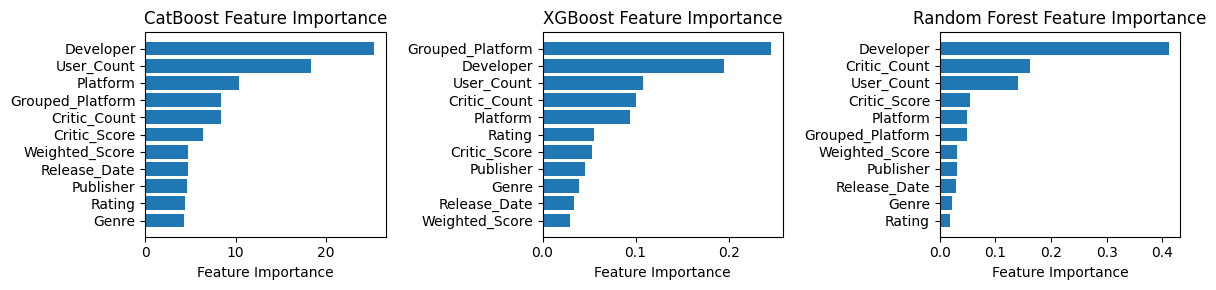

In [110]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.barh(pos_cat, feature_importance_cat[sorted_idx_cat], align='center')
plt.yticks(pos_cat, X_train.columns.values[sorted_idx_cat])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')

plt.subplot(1, 3, 2)
plt.barh(pos_xgb, feature_importance_xgb[sorted_idx_xgb], align='center')
plt.yticks(pos_xgb, X_train.columns.values[sorted_idx_xgb])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')

plt.subplot(1, 3, 3)
plt.barh(pos_rf, feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(pos_rf, X_train.columns.values[sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

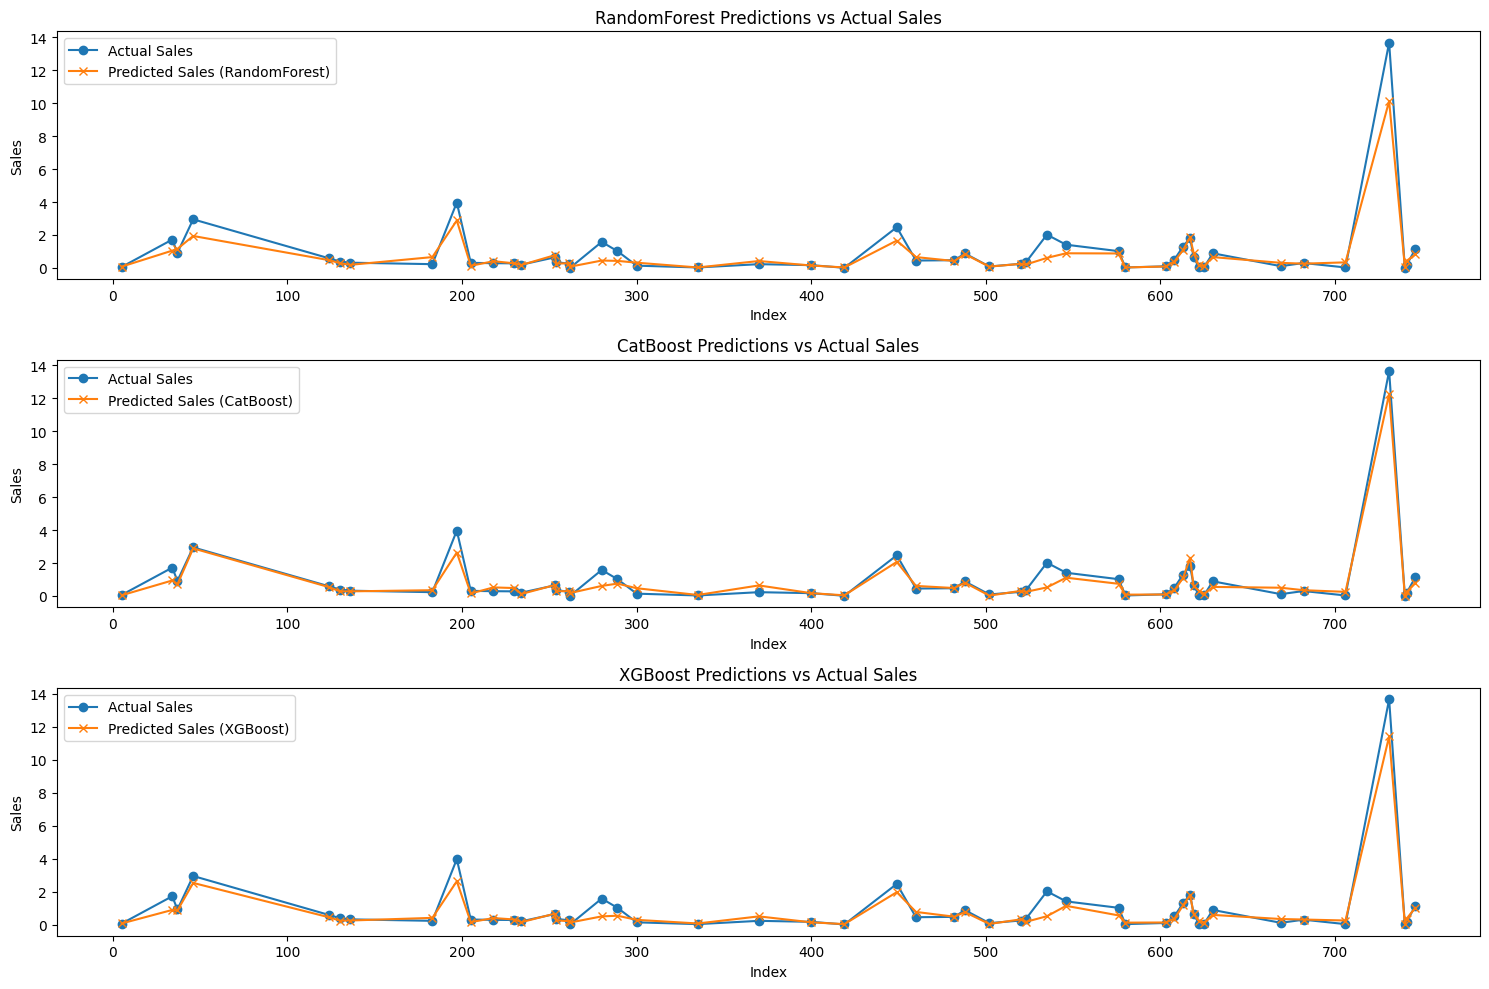

In [129]:
predictions_rf = np.expm1(model_rf.predict(X_test))
predictions_catboost = np.expm1(model_cat.predict(X_test))
predictions_xgb = np.expm1(model_xgb.predict(X_test))

results_list = []
random_games = np.random.choice(len(X_test), 50, replace=False)
random_games = np.sort(random_games)

for idx in random_games:
    predicted_value_rf = np.round(predictions_rf[idx], 2)
    predicted_value_catboost = np.round(predictions_catboost[idx], 2)
    predicted_value_xgb = np.round(predictions_xgb[idx], 2)

    actual_sales = np.round(np.expm1(Y_test.iloc[idx]['Total_Sales']), 2)
    
    game_name = data.iloc[X_test.index[idx]]['Name']

    results_list.append({
        "Index": idx,
        "Game Name": game_name,
        "Predicted Sales (CatBoost)": predicted_value_catboost,
        "Predicted Sales (RandomForest)": predicted_value_rf,
        "Predicted Sales (XGBoost)": predicted_value_xgb,
        "Actual Sales": actual_sales
    })

results_df = pd.DataFrame(results_list)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(results_df["Index"], results_df["Actual Sales"], label="Actual Sales", marker='o')
plt.plot(results_df["Index"], results_df["Predicted Sales (RandomForest)"], label="Predicted Sales (RandomForest)", marker='x')
plt.title("RandomForest Predictions vs Actual Sales")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(results_df["Index"], results_df["Actual Sales"], label="Actual Sales", marker='o')
plt.plot(results_df["Index"], results_df["Predicted Sales (CatBoost)"], label="Predicted Sales (CatBoost)", marker='x')
plt.title("CatBoost Predictions vs Actual Sales")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(results_df["Index"], results_df["Actual Sales"], label="Actual Sales", marker='o')
plt.plot(results_df["Index"], results_df["Predicted Sales (XGBoost)"], label="Predicted Sales (XGBoost)", marker='x')
plt.title("XGBoost Predictions vs Actual Sales")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()

plt.tight_layout()
plt.show()

In [173]:
results_list = []
random_games = np.random.choice(len(X_test), 20, replace=False)

for idx in random_games:
    predicted_value_rf = np.round(predictions_rf[idx],2)
    predicted_value_catboost = np.round(predictions_catboost[idx],2)
    predicted_value_xgb = np.round(predictions_xgb[idx],2)

    actual_sales = np.expm1(Y_test.iloc[idx]['Total_Sales'])
    
    game_name = data.iloc[X_test.index[idx]]['Name']

    results_list.append({
        "Nazwa gry": game_name,  
        "Przewidywana globalna sprzedaż (CatBoost)": predicted_value_catboost,
        "Przewidywana globalna sprzedaż (RandomForest)": predicted_value_rf,
        "Przewidywana globalna sprzedaż (XGBoost)": predicted_value_xgb,
        "Rzeczywista globalna sprzedaż": actual_sales
    })

results_df = pd.DataFrame(results_list)
results_df

,Nazwa gry,Przewidywana globalna sprzedaż (CatBoost),Przewidywana globalna sprzedaż (RandomForest),Przewidywana globalna sprzedaż (XGBoost),Rzeczywista globalna sprzedaż
0,The History Channel: Battle for the Pacific,0.13,0.14,0.11,0.06
1,The Black Eyed Peas Experience,0.28,0.19,0.25,0.32
2,Lego Star Wars: The Force Awakens,0.35,0.35,0.40,0.15
3,The Darkness II,0.58,0.43,0.45,0.39
4,Warriors Orochi,0.21,0.16,0.16,0.20
5,Omega Quintet,0.08,0.13,0.08,0.02
6,Juiced 2: Hot Import Nights,0.31,0.41,0.39,0.63
7,SoulCalibur V,0.46,0.59,0.49,0.58
8,Rabbids Land,0.40,0.36,0.37,0.03
9,Turning Point: Fall of Liberty,0.25,0.20,0.24,0.24


In [181]:
games_to_predict = {
     'Name': ['Cyberpunk 2077',"Assassin's Creed Odyssey",'Plague Inc: Evolved','Super Mario Maker 2','Pokémon: Ultra Sun','Doom Eternal','Forza Horizon 4','Tekken 7','Farming Simulator 22','Final Fantasy XV','The Last of Us Part II'],
     'Release_Date': [2020,2018,2015,2019,2017,2020,2018,2017,2021,2016,2020],
     "Genre": ["Action-Adventure","Action-Adventure", "Strategy", "Platform", "Role-Playing", "Shooter", "Racing", "Fighting", "Simulation", "Role-Playing", "Action"],
     "Publisher": ["CD Projekt Red Studio", "Ubisoft", "Ndemic Creation", "Nintendo", "Nintendo", "Bethesda Softworks", "Microsoft Studios", "Namco Bandai Games", "Giants Software", "Square Enix", "Sony Interactive Entertainment"],
     'Total_Sales': [19.5,5.4 ,4  ,8.42,9.19 ,5.7 ,6.5 ,6.23,2.1,5.07,10.3],
     'Critic_Score': [86 ,86  ,80 ,88  ,84   ,88  ,88  ,82  ,75 ,81  ,93],
     'Critic_Count': [106,17  , 5 ,106 ,62   ,68  ,24  ,81  ,14 ,113 ,132],
     'User_Score': [7.1  ,6.6 ,7.4,8.5 ,7.7  ,8.8 ,8.3 ,83  ,6.4,7.9 ,5.8],
     'User_Count': [35765,1106,54 ,1093,1164 ,6001,2041,529 ,43 ,7134,164062],
     "Developer": ["CD Projekt Red Studio", "Ubisoft Montreal", "Ndemic Creation", "Nintendo", "Game Freak", "id Software", "Playground Games", "Namco Bandai Games", "Giants Software", "Square Enix", "Naughty Dog"],
     "Rating": ["M", "M", "E10+", "E", "E", "M", "E", "T", "E", "T", "M"],
     "Platform": ["PC","PC", "PC", "Nintendo Switch", "3DS", "PC", "PC", "PC", "PC", "PS4", "PS4"],
     "Grouped_Platform": ["PC","PC", "PC", "Nintendo", "Nintendo", "PC", "PC", "PC", "PC", "PS", "PS"],
     'Weighted_Score': [71.0443254997,66.302760463,55.6455696203,85.26522101751459,77.8597063622,88.0,83.0581113801,62.616920152091254,66.701754386,79.0311853181,58.0281374472],
     'Developer_Rank': [1,5, 1, 5, 1, 1, 1, 1, 1, 4, 1],
     'Publisher_Rank': [1,5, 1, 5, 5, 4, 5, 5, 1, 5, 1]
}

games_to_predict_df = pd.DataFrame(games_to_predict)

X = encoder.fit_transform(games_to_predict_df)

X_pred = X[['Platform', 'Release_Date', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Count', 'Developer', 'Rating',
       'Grouped_Platform', 'Weighted_Score']]

predictions_cat = np.round(np.expm1(model_cat.predict(X_pred)),2)
predictions_rf = np.round(np.expm1(model_rf.predict(X_pred)),2)
predictions_xgb = np.round(np.expm1(model_xgb.predict(X_pred)),2)

# Porównywanie przewidywanych wartości z rzeczywistymi danymi
results_comparison = pd.DataFrame({
    "Nazwa gry": games_to_predict_df["Name"],
    "Przewidywana globalna sprzedaż (CatBoost)": predictions_cat,
    "Przewidywana globalna sprzedaż (RandomForest)": predictions_rf,
    "Przewidywana globalna sprzedaż (XGBoost)": predictions_xgb,
    "Rzeczywista globalna sprzedaż": games_to_predict_df["Total_Sales"],
})

pd.options.display.float_format = '{:.2f}'.format
results_comparison

,Nazwa gry,Przewidywana globalna sprzedaż (CatBoost),Przewidywana globalna sprzedaż (RandomForest),Przewidywana globalna sprzedaż (XGBoost),Rzeczywista globalna sprzedaż
0,Cyberpunk 2077,16.51,13.60,12.32,19.50
1,Assassin's Creed Odyssey,9.10,11.61,16.70,5.40
2,Plague Inc: Evolved,4.81,6.25,6.33,4.00
3,Super Mario Maker 2,7.02,7.42,6.65,8.42
4,Pokémon: Ultra Sun,4.63,6.03,5.73,9.19
5,Doom Eternal,12.17,10.17,9.25,5.70
6,Forza Horizon 4,7.50,6.19,9.71,6.50
7,Tekken 7,3.75,5.89,3.11,6.23
8,Farming Simulator 22,1.92,2.23,2.11,2.10
9,Final Fantasy XV,4.49,4.53,3.11,5.07
